# Eliran Refaeli & Guy Dinar

# Kaggle Dataset
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

# Project Overview

## Goals
1. Clean the data
2. Try to answer some EDA business questions
3. Try to use a variety of different packages (sns, plt) and visualizations (bars, lines, pies, boxplots)
4. Try to use different Pandas methods (info & describe, GroupBy, sort, merge (join), unions)
5. Try to complete a t-test + practice using a config file
6. Don't be afraid to fail :)

## What we learned
1. Seaborn - worked a lot and understood the robustness of the package.
2. Visual - "autopct" for adding labels to pie charts
3. Statistics - implemented a t-test

## Issues

1. Couldn't find a way to efficinetly add a trendline (regression?) to multiple bar charts (Question 5)
4. Couldn't find a way to stack area charts using Seaborn.


## Questions we couldn't answer

* Can we try to guess the original price of the car with 0 miles?

We wanted to follow a trend line back to "year zero", but couldn't failed in creating one.



# Import Libraries


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.stats import ttest_ind
import warnings


%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

# Create DataFrames

In [ ]:
# get links from github
audi_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/audi.csv'
bmw_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/bmw.csv'
focus_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/focus.csv'
ford_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/ford.csv'
hyundi_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/hyundi.csv'
merc_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/merc.csv'
skoda_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/skoda.csv'
toyota_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/toyota.csv'
vw_dataset = 'https://raw.githubusercontent.com/GuyDinar/PublicRep/main/EDA%20Files/vw.csv'

In [ ]:
# import csv as dataframe
audi = pd.read_csv(audi_dataset)
bmw = pd.read_csv(bmw_dataset)
ford = pd.read_csv(ford_dataset)
hyundi = pd.read_csv(hyundi_dataset)
merc = pd.read_csv(merc_dataset)
skoda = pd.read_csv(skoda_dataset)
toyota = pd.read_csv(toyota_dataset)
vw = pd.read_csv(vw_dataset)

# add manufacturere column and 
audi['manufacturer'] = 'Audi'
bmw['manufacturer'] = 'BMW'
ford['manufacturer'] = 'Ford'
hyundi['manufacturer'] = 'Hyundi'
merc['manufacturer'] = 'Mercedes'
skoda['manufacturer'] = 'Skoda'
toyota['manufacturer'] = 'Toyota'
vw['manufacturer'] = 'VW'

hyundi.rename(columns = {'tax(£)': 'tax'}, inplace = True)

# append (union) all files
df = audi.append([bmw, ford, hyundi, merc, skoda, toyota, vw])

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


# First impressions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85555 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85555 non-null  object 
 1   year          85555 non-null  int64  
 2   price         85555 non-null  int64  
 3   transmission  85555 non-null  object 
 4   mileage       85555 non-null  int64  
 5   fuelType      85555 non-null  object 
 6   tax           85555 non-null  int64  
 7   mpg           85555 non-null  float64
 8   engineSize    85555 non-null  float64
 9   manufacturer  85555 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.2+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,85555.000000,85555.000000,85555.000000,85555.000000,85555.000000,85555.000000
mean,2017.108305,17824.921793,22988.745076,118.950733,55.745505,1.702485
std,2.127201,10162.376307,21312.435922,64.404267,16.839501,0.584701
min,1970.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10790.000000,7041.000000,125.000000,47.100000,1.200000
50%,2017.000000,15700.000000,17232.000000,145.000000,55.400000,1.600000
75%,2019.000000,21998.000000,32345.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [ ]:
df.describe(include="O")

,model,transmission,fuelType,manufacturer
count,85555,85555,85555,85555
unique,173,4,5,8
top,Fiesta,Manual,Petrol,Ford
freq,6557,44465,44123,17965


## First impression insights:

1. No nulls in the data
2. Maximum year is 2060, minimum year is 1970.
3. Mileage has high variety of values.
5. Some sales did not report tax.
6. MPG high values don't make sense.
7. Some cars have engine size 0.


## Changing Imperial units to Metric

In [ ]:
# Change Mileage and MPG to Metric
df['kilometers'] = df.mileage * 1.6
df['kpl'] = round(df.mpg / 2.352, 1)

# Drop unused columns
df.drop(columns=['mpg', 'mileage'], inplace=True)
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,manufacturer,kilometers,kpl
0,A1,2017,12500,Manual,Petrol,150,1.4,Audi,25176.0,23.6
1,A6,2016,16500,Automatic,Diesel,20,2.0,Audi,57924.8,27.3
2,A1,2016,11000,Manual,Petrol,30,1.4,Audi,47913.6,23.6
3,A4,2017,16800,Automatic,Diesel,145,2.0,Audi,41523.2,28.6
4,A3,2019,17300,Manual,Petrol,145,1.0,Audi,3196.8,21.1


# What is the distribution of each column - Before EDA?

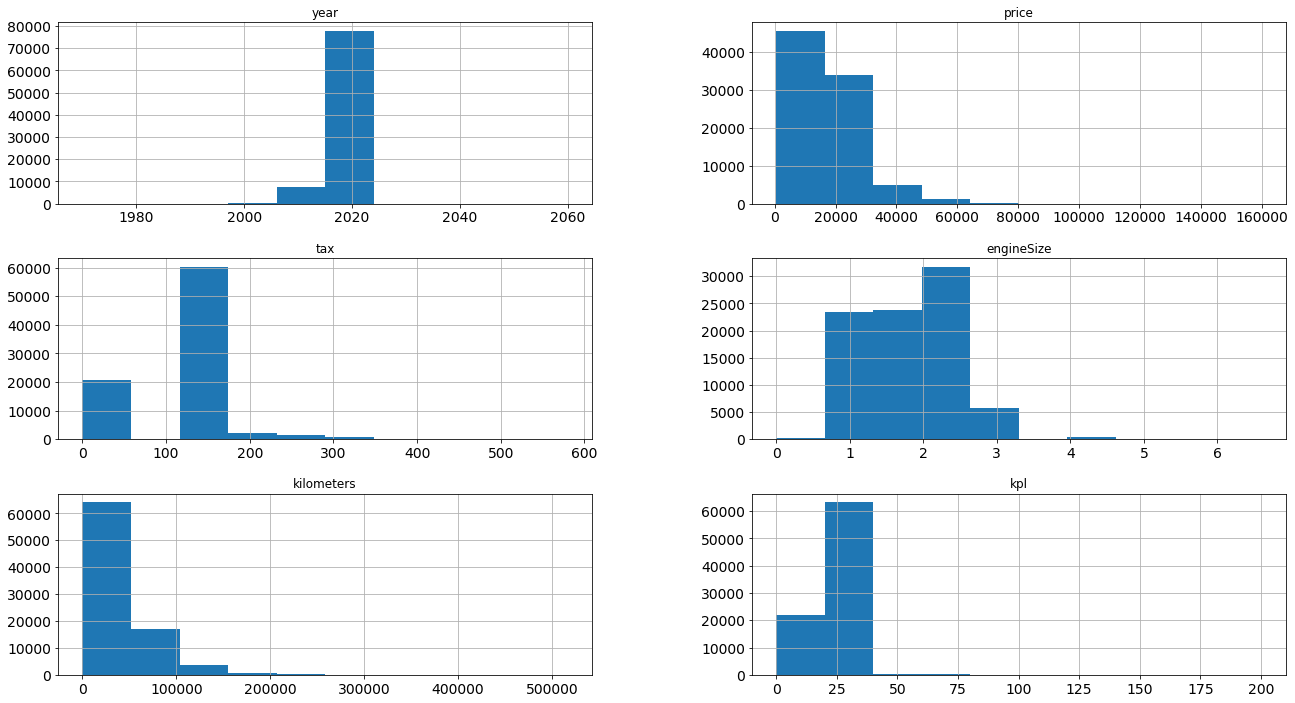

In [ ]:
df.hist(figsize=(22, 12), xlabelsize=14, ylabelsize=14);

# Cleaning the data

## General

In [ ]:
### Filter time period 2000 - 2020 ###

# We noticed very few records from before 2000 and after 2020. We decided to take a round period of exactly 20 years.
removed_years = df.year[(df.year > 2020) | (df.year < 2000)].value_counts().sum()
df1 = df[(df['year'] >= 2000) & (df['year'] <= 2020)]

print(f"We remove a total of {removed_years} records.")
print(f"The new shape of the dataframe is {df1.shape}")

We remove a total of 21 records.
The new shape of the dataframe is (85534, 10)


In [ ]:
### Clear Engine Size 0 ###

# We noticed records with engine size 0. We decided this is invalid data.
removed_engines = df1.engineSize[df1.engineSize == 0].count()
df2 = df1[df1.engineSize != 0]

print(f"We remove a total of {removed_engines} records.")
print(f"The new shape of the dataframe is {df2.shape}")

We remove a total of 239 records.
The new shape of the dataframe is (85295, 10)


## Checking outliers

In [ ]:
### Clear outlier KPL ###

# We decided to remove outliers of 3 standard deviations from the mean

three_stds = df2.kpl.std() * 3
kpl_mean = df2.kpl.mean()
kpl_min = kpl_mean - three_stds
kpl_max = kpl_mean + three_stds

print(f"""The mean is: {round(kpl_mean, 2)} 
The minimum threshold is: {round(kpl_min, 2)}
The maximum threshold is: {round(kpl_max, 2)}
""")

The mean is: 23.63 
The minimum threshold is: 5.02
The maximum threshold is: 42.25



In [ ]:
removed_kpl_std = df2.kpl[~df2.kpl.between(kpl_min, kpl_max)].count()
df3 = df2[df2.kpl.between(kpl_min, kpl_max)]

print(f"We remove a total of {removed_kpl_std} records.")
print(f"The new shape of the dataframe is {df3.shape}")

We remove a total of 568 records.
The new shape of the dataframe is (84727, 10)


In [ ]:
### Clear very high kilometers ###

# We noticed records with more than 400,000 kilometers.
df3[df3.kilometers >= 400000]

# We concluded that is valid data. These cars are ~10 years old, so it is reasonable to have such high kilometer values.

,model,year,price,transmission,fuelType,tax,engineSize,manufacturer,kilometers,kpl
9822,A6,2008,2490,Manual,Diesel,200,2.0,Audi,516800.0,18.8
11344,V Class,2010,6949,Automatic,Diesel,540,3.0,Mercedes,414400.0,13.1
5585,Octavia,2010,1485,Manual,Diesel,125,1.9,Skoda,401040.0,24.5
6069,Octavia,2010,1190,Manual,Diesel,125,1.9,Skoda,480000.0,24.5


In [ ]:
### Engine Size Sanity Check ###

df3.value_counts('engineSize').sort_index().head()

# We concluded that the new minimum of 1 makes sense.

engineSize
1.0    16520
1.1      566
1.2     5015
1.3     1327
1.4     3882
dtype: int64

## Explore further...

In [ ]:
### Removing new cars ###

# We decided that brand new cars might skew the data
df3[(df3.kilometers <= 100) & (df3.year == 2020)]

# We concluded that is valid data.

,model,year,price,transmission,fuelType,tax,engineSize,manufacturer,kilometers,kpl
198,Q7,2020,62985,Semi-Auto,Diesel,145,3.0,Audi,16.0,14.1
220,Q5,2020,37985,Semi-Auto,Petrol,145,2.0,Audi,16.0,13.6
223,Q5,2020,47895,Semi-Auto,Petrol,145,2.0,Audi,16.0,13.1
224,A4,2020,31985,Semi-Auto,Petrol,145,2.0,Audi,16.0,17.9
1964,A4,2020,34990,Semi-Auto,Diesel,145,2.0,Audi,80.0,21.4
...,...,...,...,...,...,...,...,...,...,...
14260,Touran,2020,25990,Semi-Auto,Diesel,145,2.0,VW,24.0,19.4
14466,Golf SV,2020,23290,Semi-Auto,Petrol,145,1.5,VW,16.0,18.2
14543,Golf SV,2020,22000,Semi-Auto,Petrol,145,1.5,VW,8.0,18.2
14615,Golf SV,2020,22980,Semi-Auto,Petrol,145,1.5,VW,6.4,18.2


In [ ]:
### How many records did we remove ###

total_removed_records = len(df) - len(df3)
print(f"We removed {total_removed_records} records from the data set")

We removed 828 records from the data set


In [ ]:
### Create final Dataframe ###
df = df3
len(df)

84727

# What is the distribution of each column - After EDA?

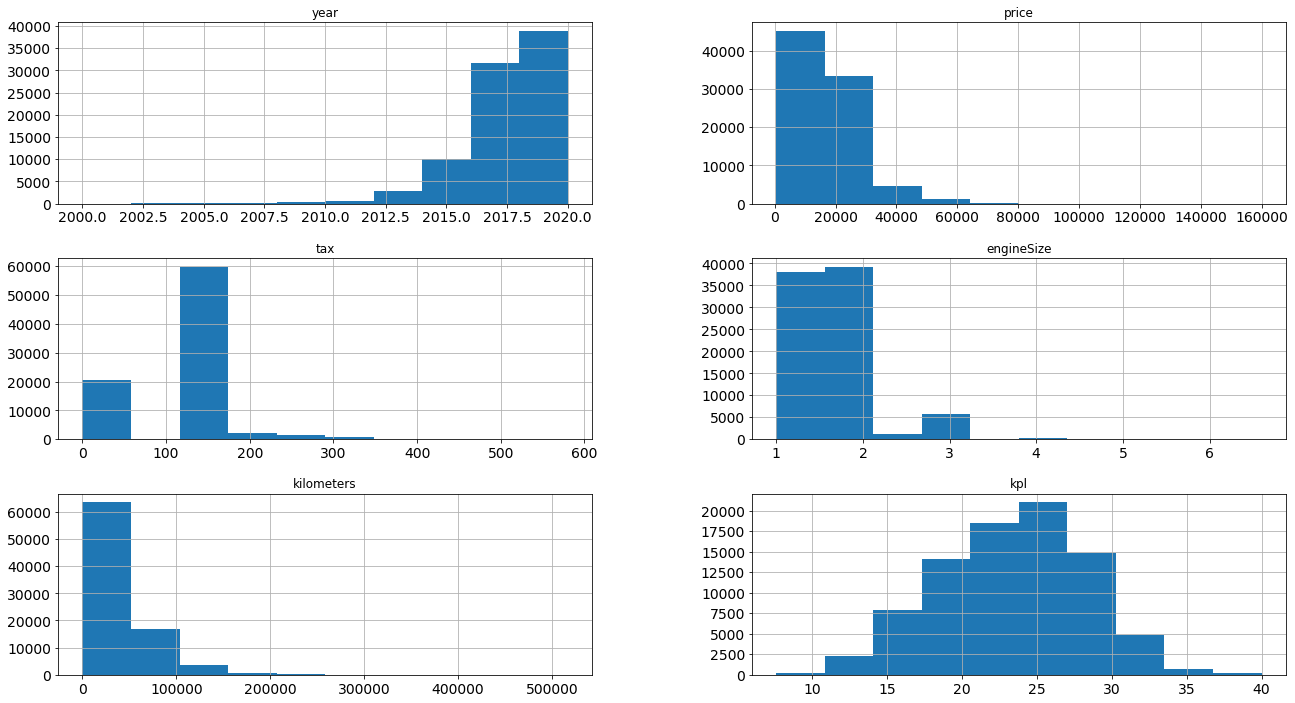

In [ ]:
df.hist(figsize=(22, 12), xlabelsize=14, ylabelsize=14);

# Exploratory Data Analysis

## General Questions
We started off with relatively easy questions to better understand the data.

###1 - Which manufacturer is the most fuel efficient, on average?

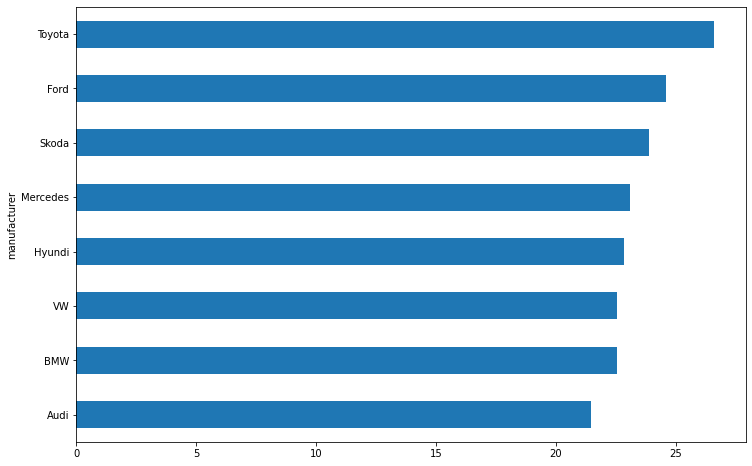

In [ ]:
# Toyota is the manufacturere with the most fuel efficiency, on average

df.groupby('manufacturer')['kpl'].agg('mean').sort_values().plot.barh(figsize=(12, 8));

###2 - What is the average price per Manufacturer, Model, Year?

In [ ]:
df.groupby(['manufacturer' ,'model', 'year']).agg(avg_price=('price', 'mean')).reset_index().head(10)

,manufacturer,model,year,avg_price
0,Audi,A1,2010,9990.000000
1,Audi,A1,2011,6302.000000
2,Audi,A1,2012,8090.761905
3,Audi,A1,2013,8745.982759
4,Audi,A1,2014,10060.084746
5,Audi,A1,2015,11245.778378
6,Audi,A1,2016,12233.848739
7,Audi,A1,2017,13445.322581
8,Audi,A1,2018,15469.126582
9,Audi,A1,2019,21208.438679


---------

###3 - Which fuel type has the highest average/median KPL

In [ ]:
# We tried having fun writing everything in one row

df.groupby('fuelType').\
        agg(kpl_mean=('kpl', 'mean'), kpl_median=('kpl', 'median')).\
        sort_values(by = ['kpl_mean'], ascending = False)

,kpl_mean,kpl_median
fuelType,,
Hybrid,30.799449,31.6
Electric,28.600000,28.6
Diesel,24.581776,25.0
Other,23.948454,24.0
Petrol,21.882024,22.2


## Question 1 - Who is the undisputed manufacturer king of used cars?
We decided to use a pie chart using pandas.

A pie chart easily shows a percentage from a total.

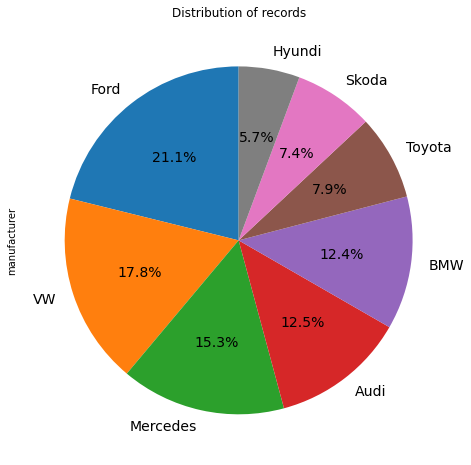

In [ ]:
q1 = df.manufacturer.value_counts()
q1.plot.pie(figsize=(12, 8), autopct='%1.1f%%', fontsize=14, startangle=90, title='Distribution of records');

## Question 2 - Which models were not paid tax on, for each manufacturer
We decided the best way to communicate this list of edge cases, would be a plain report (dataframe)

In [ ]:
q2 = df[df.tax == 0].groupby(['manufacturer', 'model']).agg(Counter=('model', 'count')).reset_index()
q2.head()

,manufacturer,model,Counter
0,Audi,A1,327
1,Audi,A3,119
2,Audi,A4,75
3,BMW,1 Series,164
4,BMW,2 Series,13


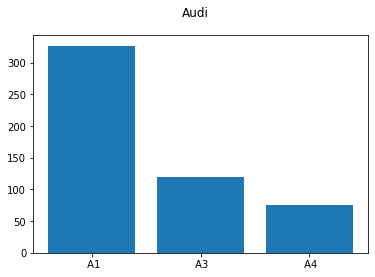

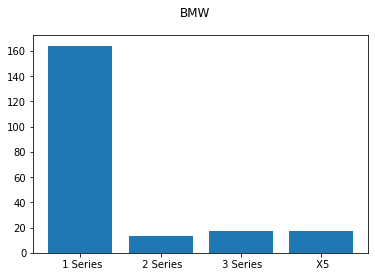

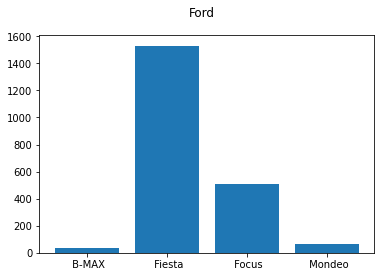

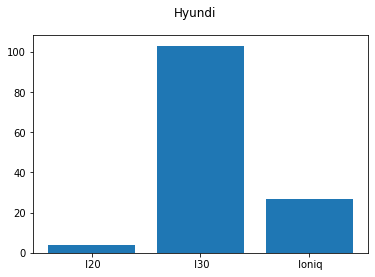

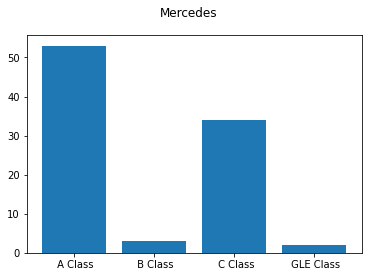

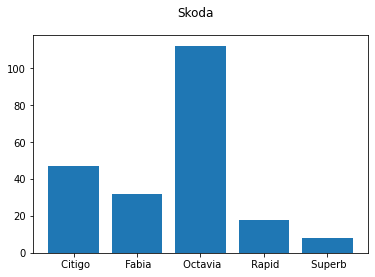

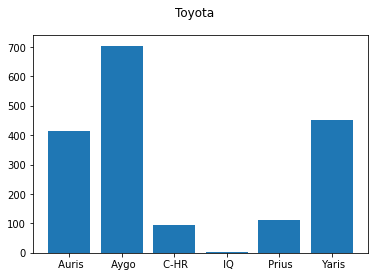

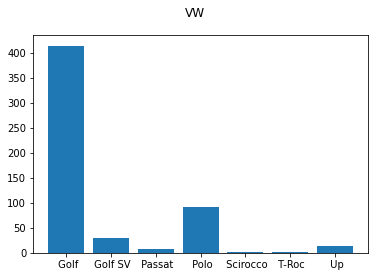

In [ ]:
manuf = q2.manufacturer.unique()
 
for i in manuf:
  fig = plt.figure(figsize=(6, 4))
  data = q2[q2.manufacturer == i]
  plt.bar(data['model'], data['Counter'])
  fig.suptitle(i)

## Question 3 - Does KPL change through time? If so, which manufacturer improved the most?

We used this opportunity to create "group by" on different levels, and completely understand the syntax for merge.


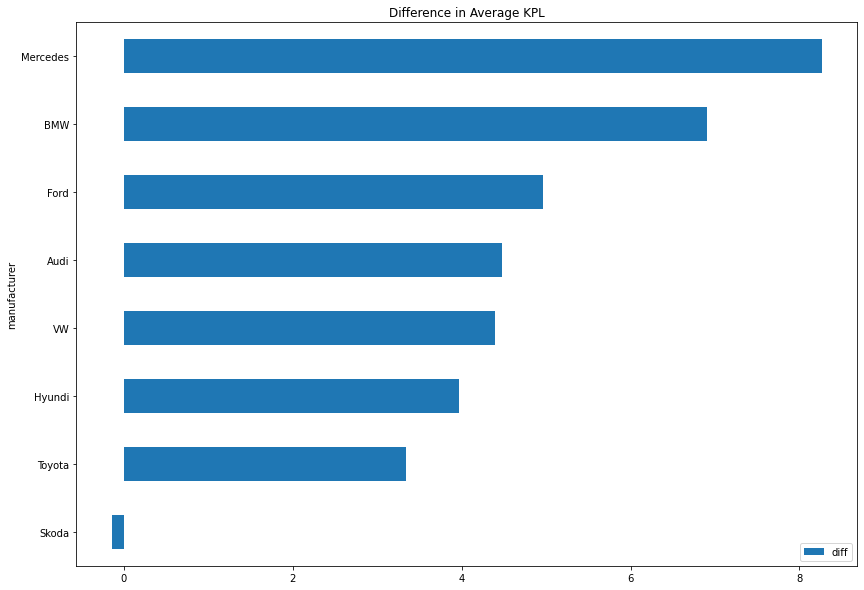

In [ ]:
q3 = df.groupby(['manufacturer', 'year']).agg(mean_kpl=('kpl', 'mean'))
q3.reset_index(inplace=True)

min_year = q3.groupby('manufacturer').agg(first_year=('year', 'min'))
max_year = q3.groupby('manufacturer').agg(last_year=('year', 'max'))

# Same procedure, 2 dataframes:
q3_A1 = pd.merge(df, min_year, how='left', left_on=['manufacturer', 'year'] , right_on=['manufacturer', 'first_year'])
q3_A2 = q3_A1[q3_A1.year == q3_A1.first_year]
q3_A3 = q3_A2.groupby('manufacturer').agg(first_year_mean=('kpl', 'mean'))

q3_B1 = pd.merge(df, max_year, how='left', left_on=['manufacturer', 'year'] , right_on=['manufacturer', 'last_year'])
q3_B2 = q3_B1[q3_B1.year == q3_B1.last_year]
q3_B3 = q3_B2.groupby('manufacturer').agg(last_year_mean=('kpl', 'mean'))

# join together
joined_df = pd.merge(q3_A3, q3_B3, on='manufacturer')
joined_df['diff'] = joined_df.last_year_mean - joined_df.first_year_mean

joined_df.sort_values(by='diff').plot(kind='barh', figsize=(14, 10), y='diff', title='Difference in Average KPL');

## Question 4 - How does KPL change over time, for each transmission type?


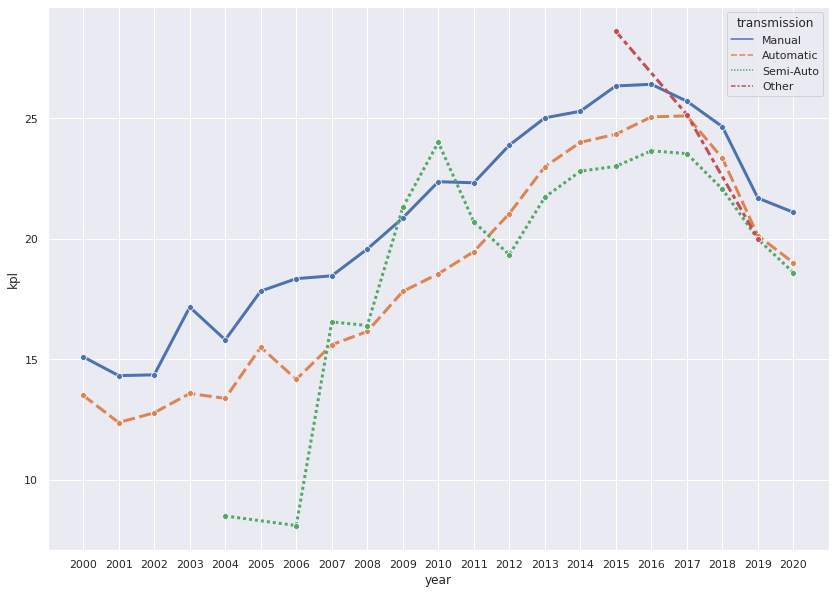

In [ ]:
# We tried using Seaborn with a built-in mean function for graphs

plt.figure(figsize=(14,10))

sns.set(font_scale=1) # Set font size
q4 = sns.lineplot(data=df, x='year', y='kpl', estimator=np.mean, # built-in average
                  style='transmission', hue='transmission', marker='o', legend="brief", linewidth=3, ci=None)
q4.set_xticks(ticks=range(2000, 2021)) # fixes years like 2002.5
plt.show() 

## Question 5 - How did each manufacturer's price change through time, per age?
We decided to challenges ourselves and try to create a visual with multiple figures.

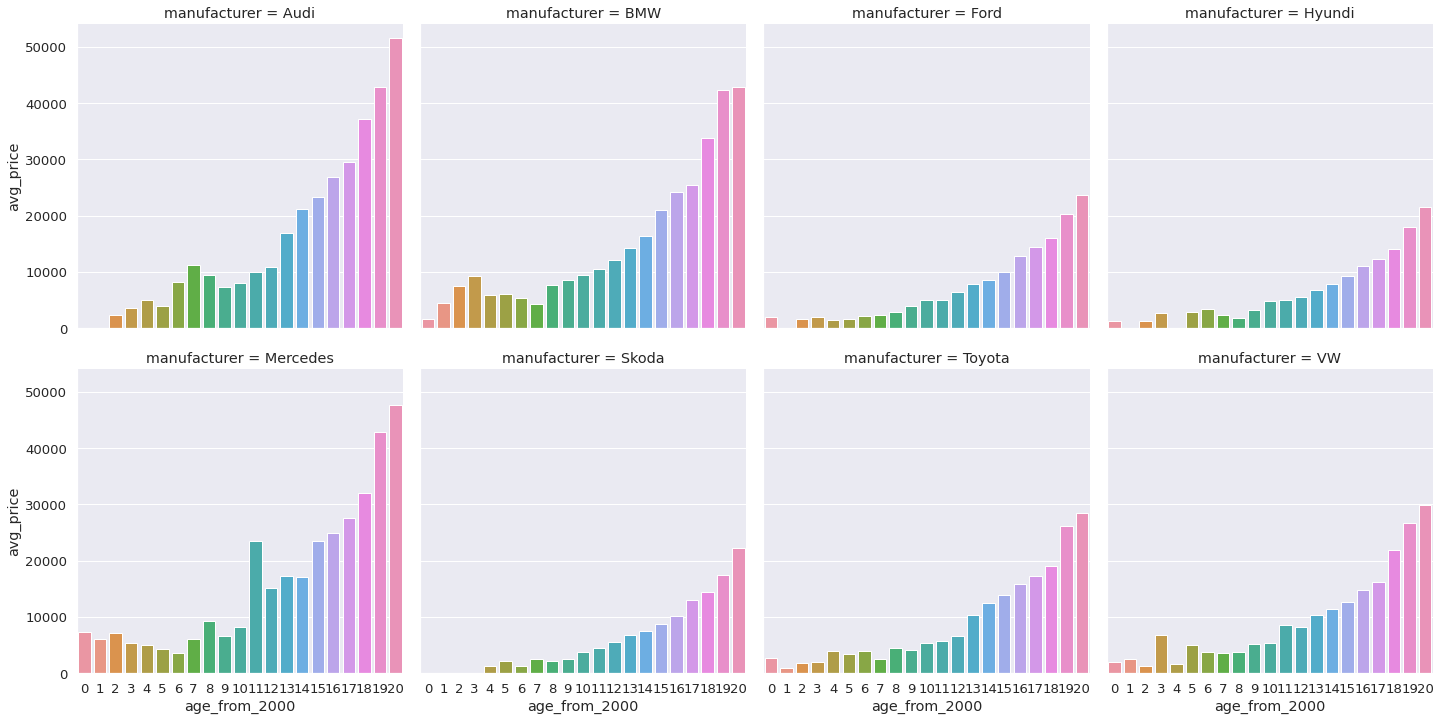

In [ ]:
df['age_from_2000'] = df.year - df.year.min()

q5 = df.groupby(['manufacturer', 'model', 'age_from_2000']).agg(avg_price=('price', 'mean'))
q5.reset_index(inplace=True)

sns.set(font_scale=1.2) # Set font size
sns.catplot(x='age_from_2000', y='avg_price', col='manufacturer', data=q5, kind='bar', ci=None, col_wrap=4);

## Question 6 - What is the distribution of transmission types, over time?
We wanted to do this one in Seaborn, but couldn't find a way to stack the area charts.

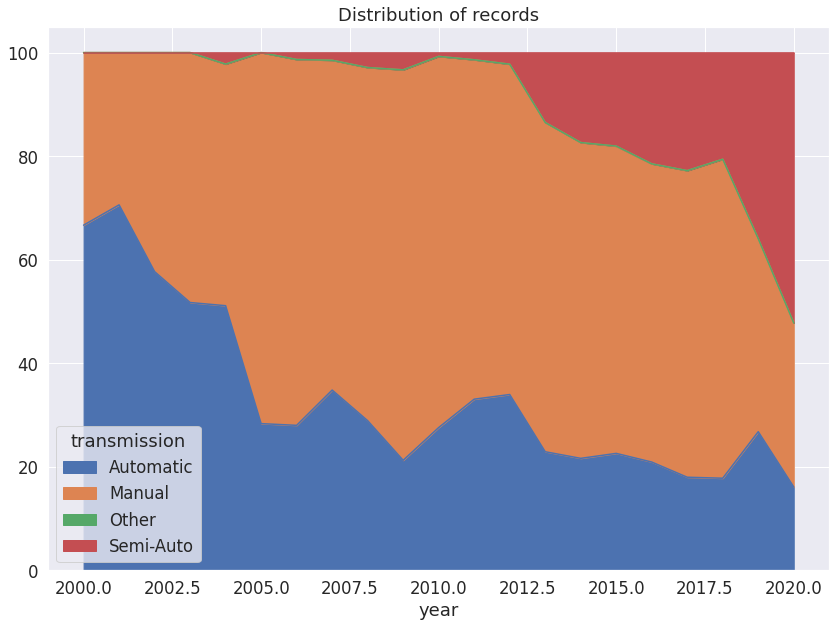

In [ ]:
# We wanted to use a lambda function to normalize values

q6 = df.groupby(['transmission', 'year']).agg(Counter=('transmission', 'count'))

q6_A = q6.groupby(['year']).apply(lambda x: 100 * x / float(x.sum())) # Use lambda to normalize values
q6_A.reset_index(inplace=True)

pivot = q6_A.pivot(index='year', columns='transmission', values='Counter')
pivot.plot(kind='area', stacked=True, figsize=(14,10), title='Distribution of records');

## Question 7 - what is the variety of engine sizes per transmission per manufacturer?
We tried answering this one using WOE.


In [ ]:
df['woe'] = df['manufacturer']+'-'+df['transmission']+'-'+df['engineSize'].astype(str) # Create one big string instead of group by

q7 = df.groupby('woe').agg(counter=('manufacturer', 'count'))
records = sum(q7['counter'])
q7['normalized'] = (q7['counter'] / records)*100 # Use sum() to normalize values

print(f"There are {len(q7)} different combinations of Manufacturer-Transmission-EngineSize")
q7.sort_values(by='normalized', ascending=False)

There are 268 different combinations of Manufacturer-Transmission-EngineSize


,counter,normalized
woe,,
Ford-Manual-1.0,7078,8.353890
BMW-Semi-Auto-2.0,2897,3.419217
Ford-Manual-1.5,2853,3.367286
VW-Manual-1.0,2760,3.257521
Ford-Manual-2.0,2455,2.897542
...,...,...
BMW-Semi-Auto-4.0,1,0.001180
BMW-Automatic-3.5,1,0.001180
Ford-Manual-3.2,1,0.001180


## Question 8 - What is the most contributing factor that affects the price?
We decided a correlation heatmap would be the best choice.

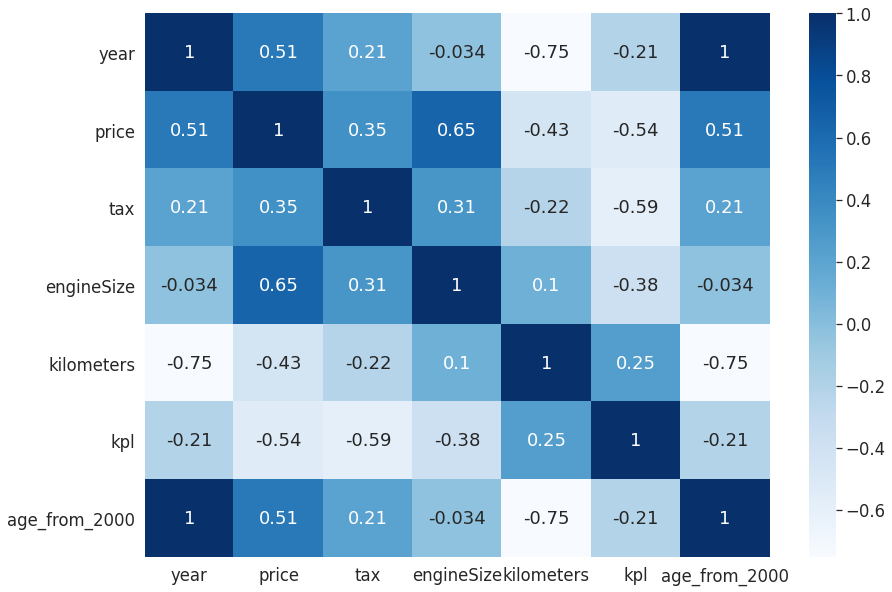

In [ ]:
plt.figure(figsize=(14,10))
int_cols = df.select_dtypes(include=np.number).columns.tolist()
q8 = df[int_cols]

sns.set(font_scale=1.5) # Set font size
sns.heatmap(data=q8.corr(), cmap='Blues', annot=True);

## Implementing t-test

We wanted to apply some of the statistics we spent time learning, and decided to try a t-test.

Our null hypothesis is that there is no material difference between Audi prices and BMW prices.

In [ ]:
# Taking relevant records
audi_bmw = df[(df.manufacturer == 'Audi') | (df.manufacturer == 'BMW')]
audi_bmw.head()

,model,year,price,transmission,fuelType,tax,engineSize,manufacturer,kilometers,kpl,age_from_2000,woe
0,A1,2017,12500,Manual,Petrol,150,1.4,Audi,25176.0,23.6,17,Audi-Manual-1.4
1,A6,2016,16500,Automatic,Diesel,20,2.0,Audi,57924.8,27.3,16,Audi-Automatic-2.0
2,A1,2016,11000,Manual,Petrol,30,1.4,Audi,47913.6,23.6,16,Audi-Manual-1.4
3,A4,2017,16800,Automatic,Diesel,145,2.0,Audi,41523.2,28.6,17,Audi-Automatic-2.0
4,A3,2019,17300,Manual,Petrol,145,1.0,Audi,3196.8,21.1,19,Audi-Manual-1.0


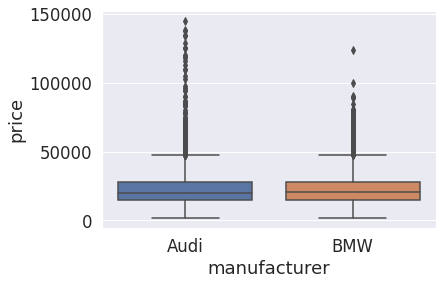

In [ ]:
sns.boxplot(x="manufacturer", y="price", data=audi_bmw)

In [ ]:
# Sampling -- Bootstrapping

audi_bmw_means = pd.DataFrame({'Audi':[audi_bmw[audi_bmw.manufacturer == 'Audi'].price.sample(100).mean() for i in range(1000)],
                                'BMW':[audi_bmw[audi_bmw.manufacturer == 'BMW'].price.sample(100).mean() for i in range(1000)]})

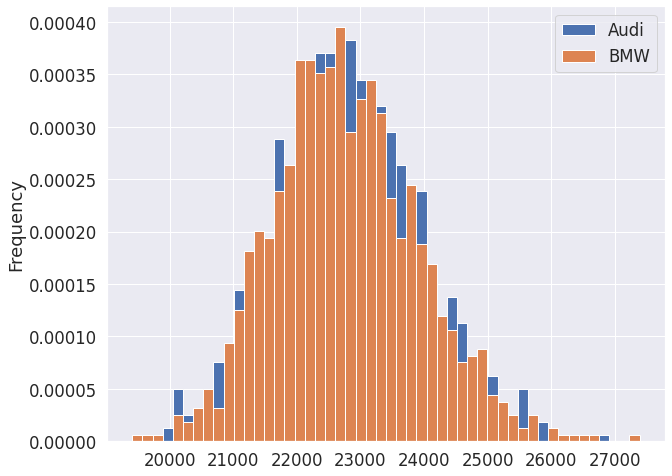

In [ ]:
audi_bmw_means.plot.hist(bins=50, density=True, figsize=(10,8));

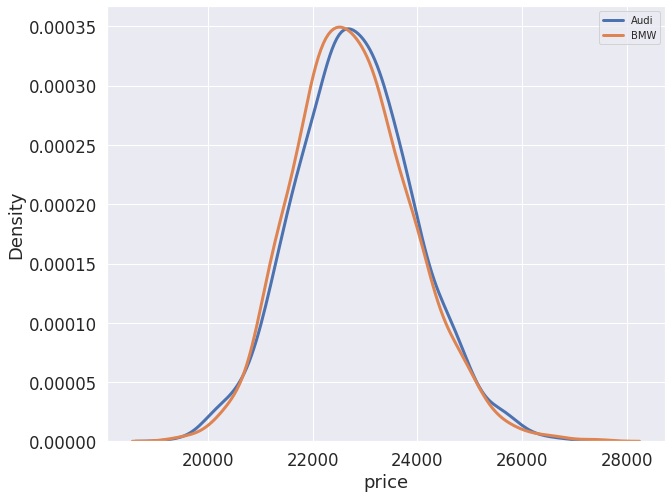

In [ ]:
# plotting the Density Lines

manufacturers = audi_bmw_means.columns.to_list()
plt.figure(figsize=(10,8))

warnings.filterwarnings("ignore")

for man in manufacturers:
    # Subset to the airline
    subset = audi_bmw_means[man]
    
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = man);
    
# Plot formatting
plt.legend(prop={'size': 10})
plt.xlabel('price')
plt.ylabel('Density');

Creating a function that uses a config file

In [ ]:
# Config File

configs = {
            "df" : audi_bmw,
            "col_1" : "manufacturer",
            "col_2" : "price" ,
            "param1" : "Audi",
            "param2" : "BMW",
            "alpha" : 0.05
           }

In [ ]:
# Creating the function

def run_t_test(df : pd.DataFrame,
               col_1 : str,
               col_2 : str,
               param1 : str,
               param2 : str,
               alpha : float):

  # 2 Filter elevant columns
  df = df[[col_1, col_2]]

  # 3 split the prices into two series, one for each manufacturer 
  df1 =  df[df[col_1] == param1][col_2]
  df2 =  df[df[col_1] == param2][col_2] 

  # 4 Run t-test 
  ttest, pval = ttest_ind(df1, df2)

  # 5 Reject or Accept the null hypothesis
  is_significant = 1 if pval < alpha else 0 
    
  return {'statistic' : ttest, 'p_value' : pval, 'significant' : is_significant}

In [ ]:
dic = run_t_test(**configs)

print(f"""
The statistic score is {round(dic['statistic'], 2)}
The p-value is {round(dic['p_value'], 2)}""")


The statistic score is 0.93
The p-value is 0.35


The results show that the p value is higher than the alpha, which means we cannot reject the null hypothesis.